In [1]:
import numpy as np  
import random
import matplotlib.pyplot as plt 


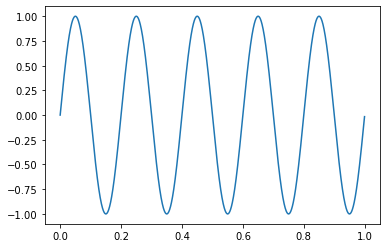

In [70]:
dt=0.0005
t=np.arange(0,1,dt)
f=np.sin(5*2*np.pi*t)
plt.plot(t,f)
plt.show()

In [71]:
n=len(t)
fhat=np.fft.fft(f,n)
PSD=fhat*np.conj(fhat)/n
freq=np.arange(50)#Between 0 and freq plot
L=np.arange(1,np.floor(50),dtype='int')#Since Half is just symmetrical

C:\Users\saurabh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


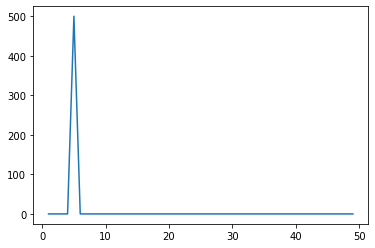

In [72]:
plt.plot(freq[L],PSD[L])

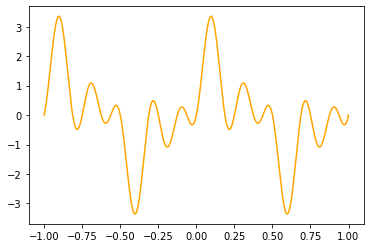

In [74]:
x=np.linspace(-1,1,num=1000,endpoint=True)
y=np.sin(2*np.pi*x)+np.sin(3*2*np.pi*x)-np.cos(5*2*np.pi*x)+np.cos(2*np.pi*x)
plt.plot(x,y,color='orange')
plt.show()

C:\Users\saurabh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


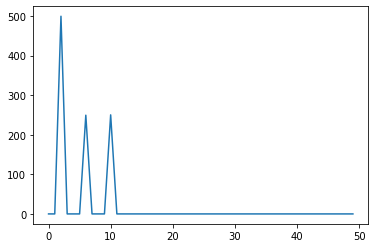

In [78]:
ffty=np.fft.fft((y))
RealfftY=ffty*np.conj(ffty)/1000
freq=np.arange(50)
plt.plot(freq[:50],RealfftY[:50])

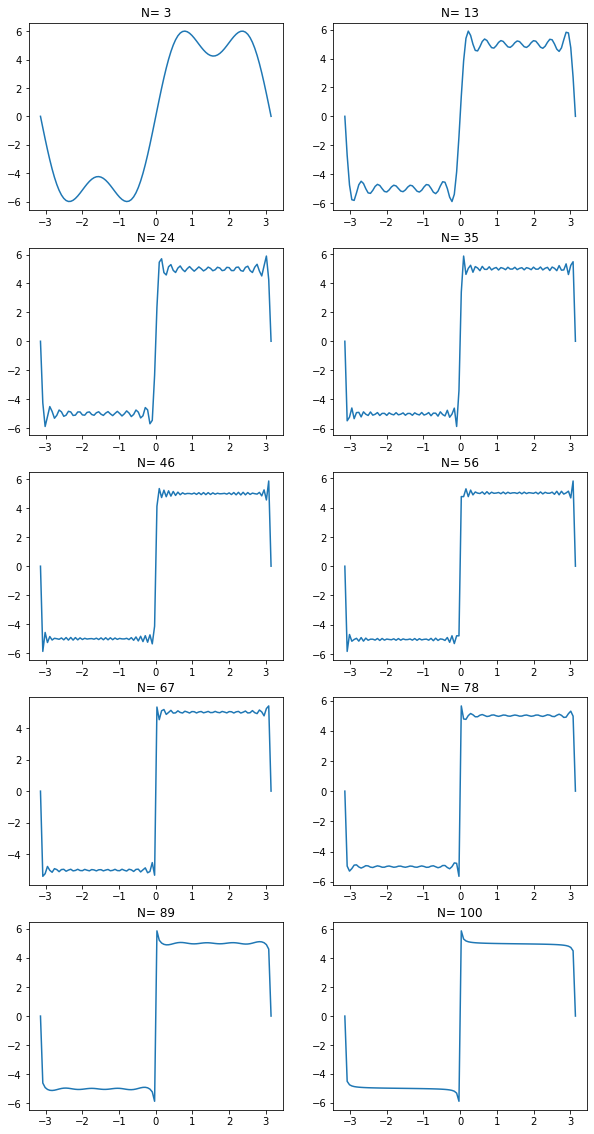

In [5]:
fig,ax=plt.subplots(5,2,figsize=(10,20))
n=np.linspace(3, 100,num=10)
step=5
index=0
for axes in ax:
    for axis in axes:
        theta=np.linspace(-np.pi, np.pi,num=100)
        Y=np.linspace(0, 0,num=100)
        for i in range(0,int(n[index])+1):
            if i%2!=0:
                Y=Y+(4*step*np.sin(i*theta))/(np.pi*i)
        axis.plot(theta,Y)
        axis.set_title('N= {}'.format(int(n[index])))
        index+=1
plt.show()

#NoisedData

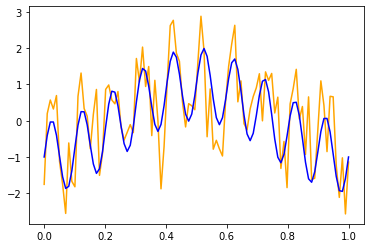

In [141]:
theta=np.linspace(0,1,num=100,endpoint=True)
puresignal=np.sin(10*2*np.pi*theta)-np.cos(2*np.pi*theta)
RealSignal=np.sin(10*2*np.pi*theta)-np.cos(2*np.pi*theta)
for i in range(RealSignal.shape[0]):
    RealSignal[i]+=0.25*np.random.logistic(1,2,1)
plt.plot(theta,RealSignal,color='orange')
plt.plot(theta,puresignal,color='blue')
plt.show()

C:\Users\saurabh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


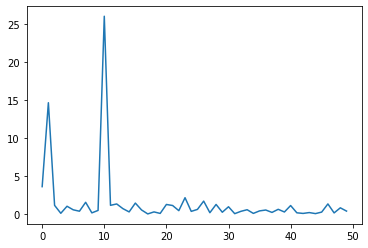

In [142]:
fftNoiseSignal=np.fft.fft(RealSignal,100)
PSDNoiseSignal=fftNoiseSignal*np.conj(fftNoiseSignal)/100
freq=np.arange(100)
plt.plot(freq[:50],PSDNoiseSignal[:50])
plt.show()

C:\Users\saurabh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


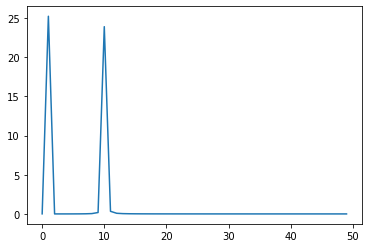

In [143]:
fftClearSignal=np.fft.fft(puresignal,100)
PSDClearSignal=fftClearSignal*np.conj(fftClearSignal)/100
freq1=np.arange(100)
plt.plot(freq1[:50],PSDClearSignal[:50])
plt.show()

C:\Users\saurabh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


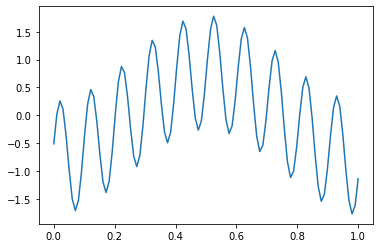

In [146]:
indices=PSDNoiseSignal>10
#PSDfilteredSignal=indices*PSDNoiseSignal
fftfilteredSignal=indices*fftNoiseSignal
filteredSignal=np.fft.ifft(fftfilteredSignal)
plt.plot(theta,filteredSignal)